<h1 style="text-align:center;font-size:36px;font-weight:bold;">How to get some useful plots using the brightwind library</h1>

In [1]:
import datetime
print('Last updated: {}'.format(datetime.date.today().strftime('%d %B, %Y')))

Last updated: 15 October, 2024


<hr class="gray-line">
<font size="6">Outline:</font>

This guide will demonstrate how to use some of the plotting functions using the following steps:


1. ``apply_cleaning()`` with a simple csv:

   <span style="color:white;">•</span>  Import the brightwind library and some sample data

   <span style="color:white;">•</span>  Plot a time series of anemometer data for specific periods of interest

   <span style="color:white;">•</span>  Plot a scatter plot of two instruments

   <span style="color:white;">•</span>  Plot a scatter plot of two anemometers

   <span style="color:white;">•</span>  Plot a scatter plot of two wind vanes

   <span style="color:white;">•</span>  Sector ratio plot

In [3]:
import brightwind as bw

In [4]:
# specify location of existing sample dataset
filepath = r'E:\Programs\brightwind\brightwind\demo_datasets\demo_data.csv'
# load data as dataframe
data = bw.load_csv(filepath)
# show first few rows of dataframe
data.head(5)

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-09 15:30:00,8.370,7.911,8.160,7.849,7.857,7.626,1.240,1.075,1.060,0.947,...,6.100,110.1,6.009,112.2,5.724,0.711,100.0,935.0,0.0,12.94
2016-01-09 15:40:00,8.250,7.961,8.100,7.884,7.952,7.840,0.897,0.875,0.900,0.855,...,5.114,110.9,4.702,109.8,5.628,0.630,100.0,935.0,0.0,12.95
2016-01-09 17:00:00,7.652,7.545,7.671,7.551,7.531,7.457,0.756,0.703,0.797,0.749,...,4.172,113.1,3.447,111.8,4.016,1.126,100.0,934.0,0.0,12.75
2016-01-09 17:10:00,7.382,7.325,6.818,6.689,6.252,6.174,0.844,0.810,0.897,0.875,...,4.680,118.8,5.107,115.6,5.189,0.954,100.0,934.0,0.0,12.71
2016-01-09 17:20:00,7.977,7.791,8.110,7.915,8.140,7.974,0.556,0.528,0.562,0.524,...,3.123,115.9,2.960,113.6,3.540,0.863,100.0,934.0,0.0,12.69


<hr class="gray-line">
<font size="6">Plot a time series</font>

First off we would like to plot a timeseries of each of the anemometers on the mast. To do this, we need to specify a python list with the column heading names of each of the average values of the anemometers. We then call the plot_timeseries function to plot the timeseries.

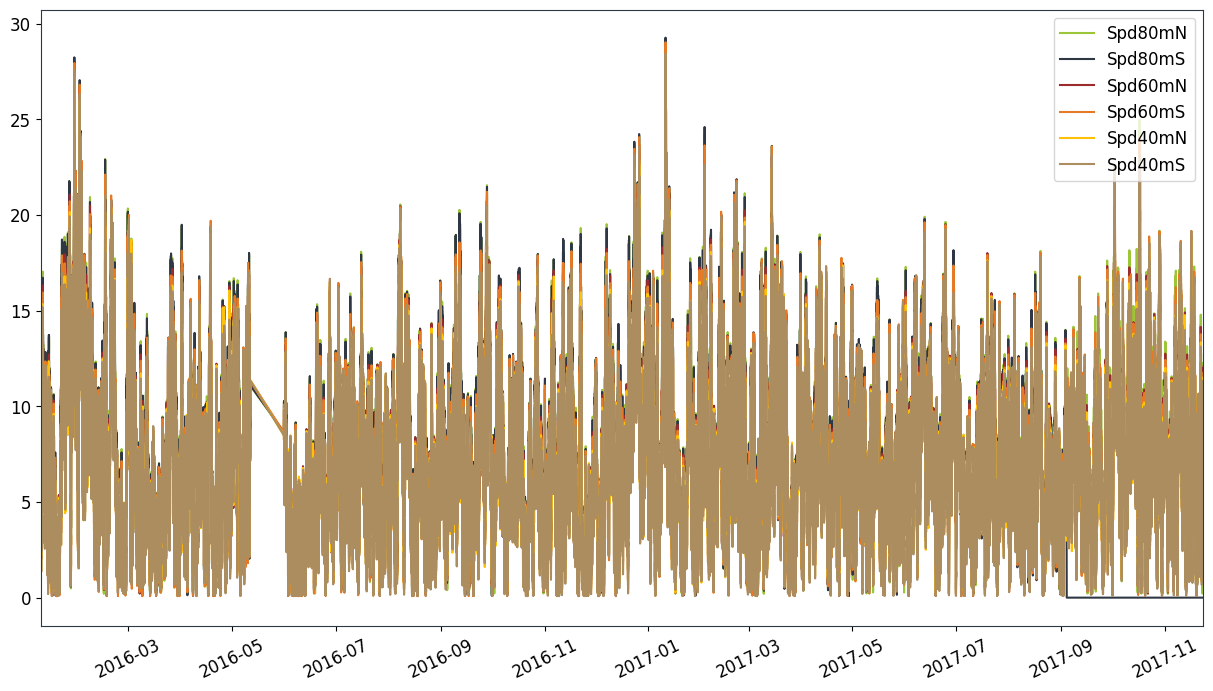

In [5]:
anemometers = ['Spd80mN','Spd80mS', 'Spd60mN', 'Spd60mS', 'Spd40mN', 'Spd40mS']
bw.plot_timeseries(data[anemometers])

The timeseries plotted above is very busy because we have displayed all of the data. Lets just take a look at a specific data range for a specific anemometer.

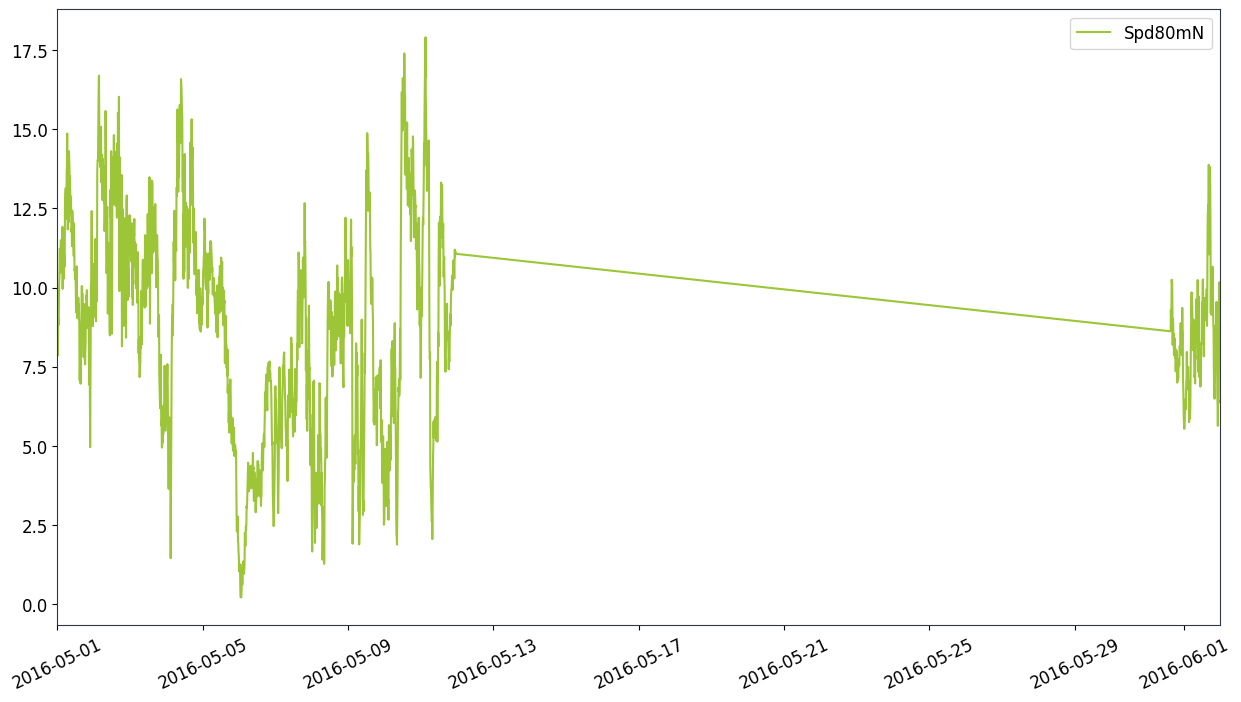

In [6]:
bw.plot_timeseries(data['Spd80mN']['2016-05-01':'2016-06-01'])

<hr class="gray-line">
<font size="6">Scatter plot of any two variables</font>

The plot_scatter() function allows the user to plot any two variables from a dataframe against each other. In the example below we have plotted the temperature against the precipitation.

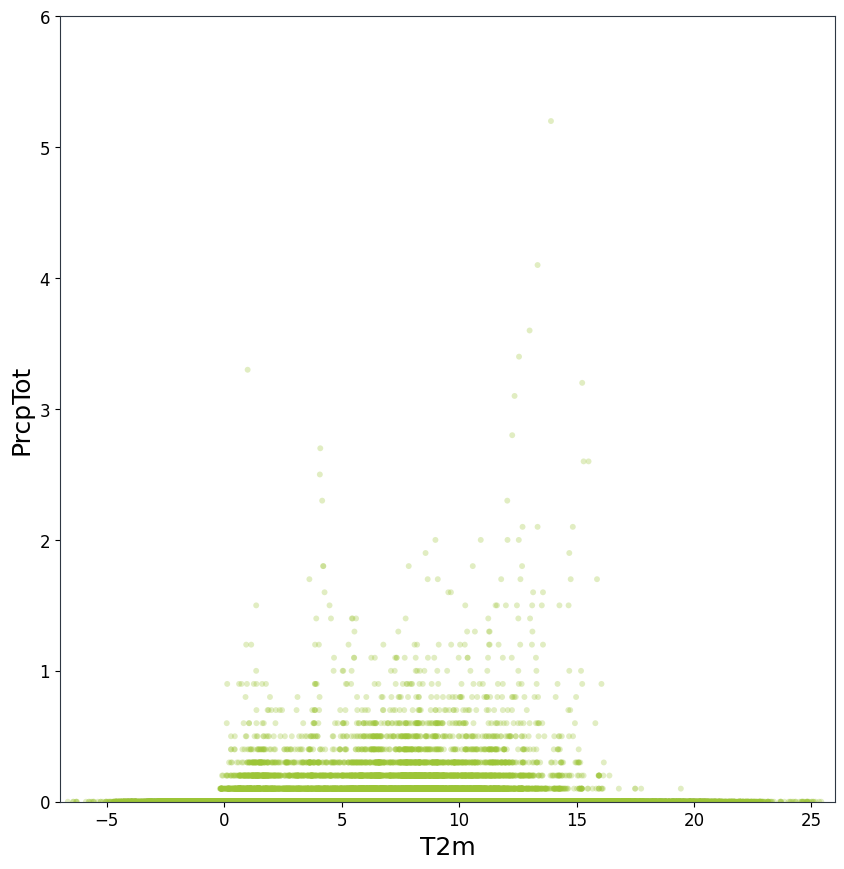

In [13]:
bw.plot_scatter(data.T2m,data.PrcpTot, axes_equal=False)

The graph could do with being improved by changing the x and y axis labels, and including some min and max y-limits. To this we use the variables x_axis_title, y_axis_title and y_limits.

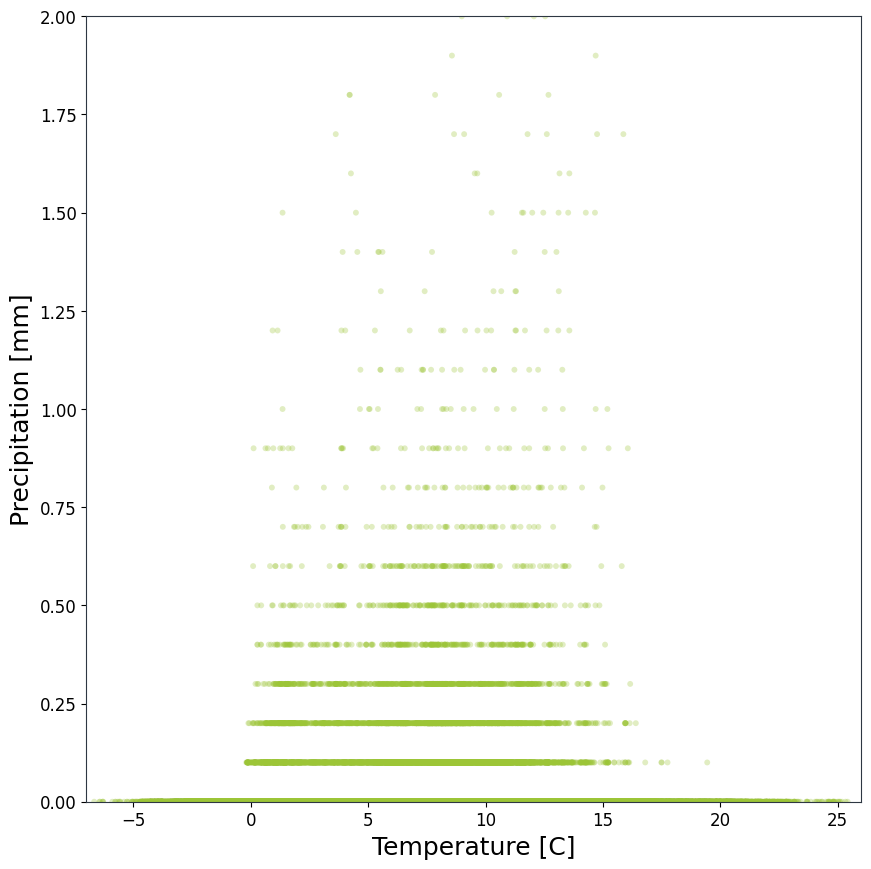

In [12]:
bw.plot_scatter(data.T2m,data.PrcpTot,x_label='Temperature [C]',y_label='Precipitation [mm]',y_limits=(0,2), axes_equal=False, figure_size=(10, 10.2))

<hr class="gray-line">
<font size="6">Scatter plot of two anemometers</font>

The brightwind library has been specifically designed with wind data in mind. So a special scatter plot function plot_scatter_wspd() for windspeed data was created to include a reference line, appropriate x and y limits and appropriate x and y labeling.

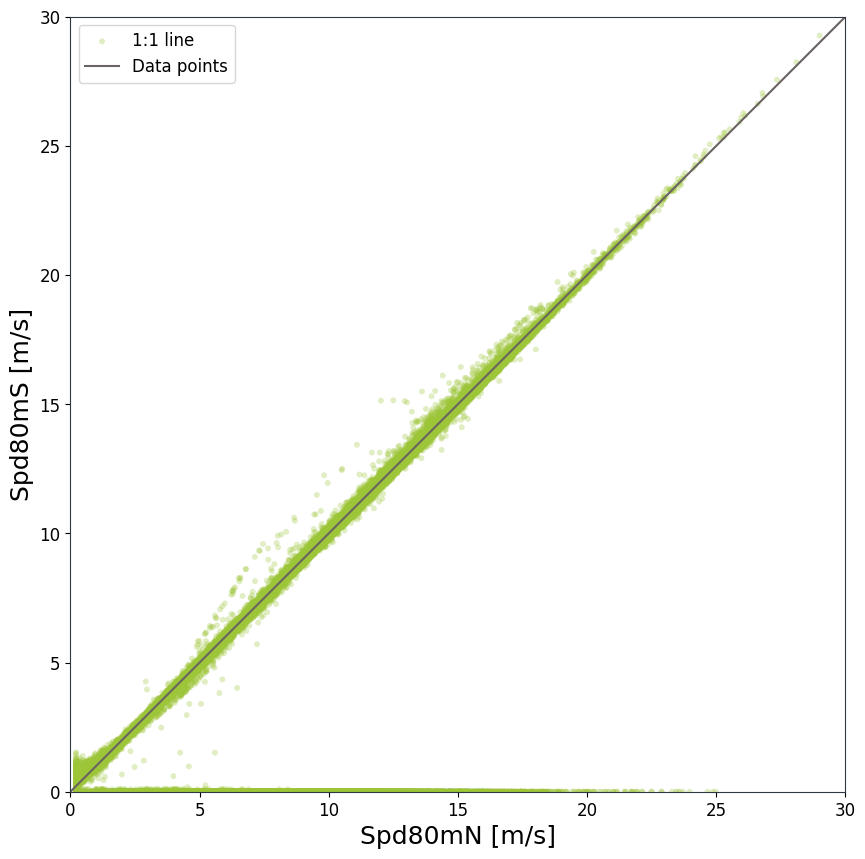

In [15]:
bw.plot_scatter_wspd(data.Spd80mN,data.Spd80mS)

<hr class="gray-line">
<font size="6">Scatter plot of two wind vanes</font>

In addition, as plotting wind vanes in a scatter plot is a common requirement, a simple plot_scatter_wdir() function is included to allow two wind vanes to be plotted with appropriate reference line and x and y axis labels and limits. A unusual horizontal line can be seen in the data which originates from one of the wind vanes failing, and the output being fixed a constant value.

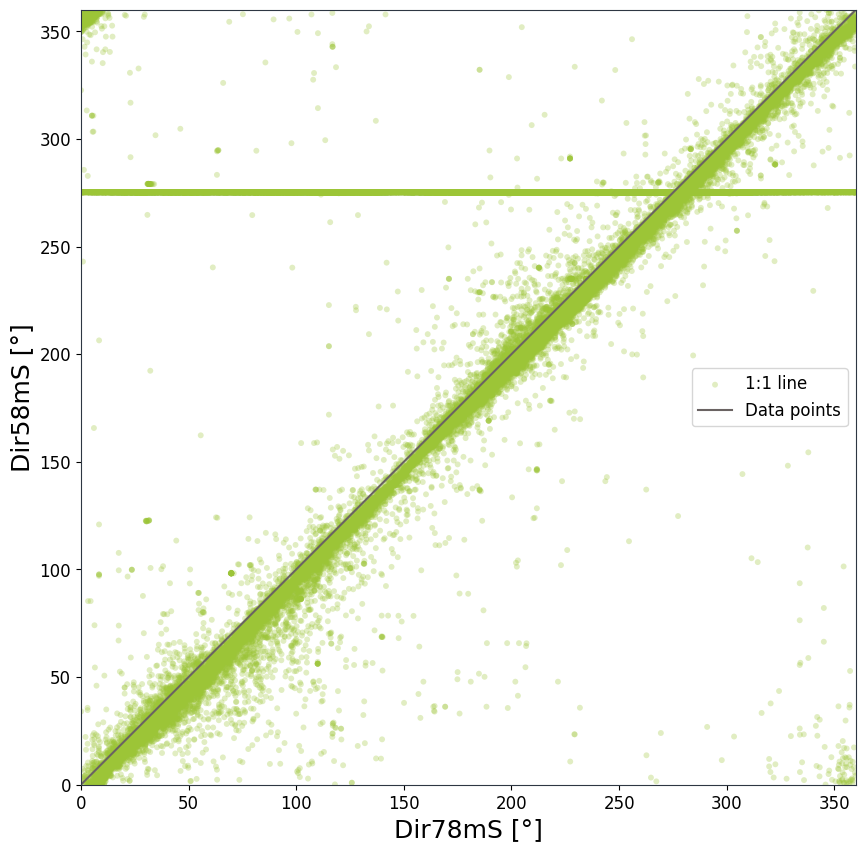

In [16]:
bw.plot_scatter_wdir(data.Dir78mS,data.Dir58mS)

<hr class="gray-line">
<font size="6">Sector Ratio Plot</font>

A ratio plot of two separate anemometers mounted at the same height by direction is useful for understanding if the mounting arrangements of two anemometers are correct. Here we use the sector_ratio() function to plot the two 80m anemometers versus the 78m wind vane, and include the boom directions as variables so we can see them plotted on the polar plot.

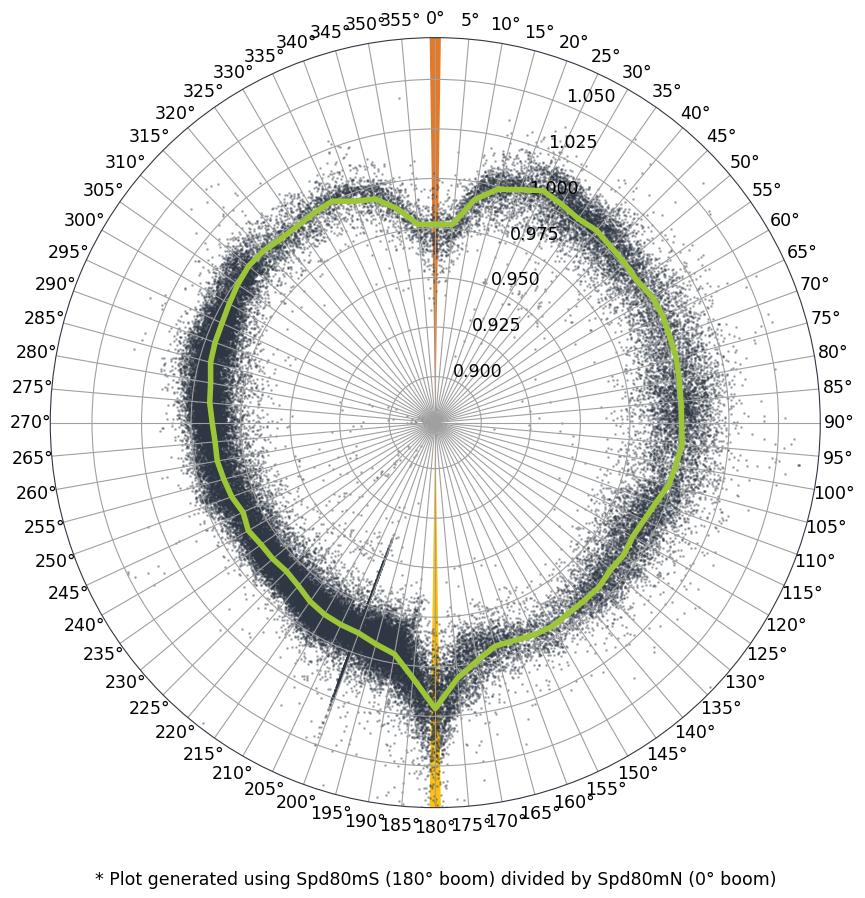

In [17]:
bw.sector_ratio(data.Spd80mN,data.Spd80mS,data.Dir78mS,boom_dir_1=0,boom_dir_2=180)

In [ ]:
<hr class="gray-line">
<font size="6">Outline:</font>